In [96]:
#!pip install keras
#!pip install visualkeras


In [97]:
#source code
#https://github.com/KhuyenLE-maths/LeNet_model_with_MNIST_recognition/blob/main/LeNet_with_MNIST_recognition.ipynb

In [98]:
import keras
from tensorflow import keras
import keras.layers as layers
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input,LeakyReLU,Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy, binary_crossentropy
import tensorflow as tf
import visualkeras
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [99]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)


X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


In [100]:
"""
train_mask = np.isin(Y_train, [0,1,2,3,4,5,6,7,8,9])
test_mask = np.isin(Y_test, [0,1,2,3,4,5,6,7,8,9])

X_train, Y_train = X_train[train_mask], np.array(Y_train[train_mask] == 8)
X_test, Y_test = X_test[test_mask], np.array(Y_test[test_mask] == 8)
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape,'Y_train shape', Y_train.shape, 'Y_test shape', Y_test.shape )
"""

"\ntrain_mask = np.isin(Y_train, [0,1,2,3,4,5,6,7,8,9])\ntest_mask = np.isin(Y_test, [0,1,2,3,4,5,6,7,8,9])\n\nX_train, Y_train = X_train[train_mask], np.array(Y_train[train_mask] == 8)\nX_test, Y_test = X_test[test_mask], np.array(Y_test[test_mask] == 8)\nprint('X_train shape', X_train.shape, 'X_test shape', X_test.shape,'Y_train shape', Y_train.shape, 'Y_test shape', Y_test.shape )\n"

In [101]:
def LeNet():
  model = Sequential()
  
  # Convolutional layer  
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
  
  # Max-pooing layer with pooling window size is 2x2
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Convolutional layer 
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  
  # Max-pooling layer 
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Flatten layer 
  model.add(Flatten())
  
  # The first fully connected layer 
  model.add(Dense(120, activation = 'relu'))
  
  # The output layer  
  model.add(Dense(10, activation = 'softmax'))
  
  # compile the model with a loss function, a metric and an optimizer function
  # In this case, the loss function is categorical crossentropy, 
  # we use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01 to optimize the loss function
  # metric: accuracy 
  
  opt = SGD(learning_rate=0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return model

In [102]:
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  
  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  
  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0
  
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return X_train, y_train, X_test, y_test

In [103]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 120)              

In [104]:
def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

def train_model(model, X_train, y_train, X_test, y_test, epochs = 2, batch_size = 256):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  # Fitting the model on the training set
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)
  # evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  summary_history(history)

Epoch 1/2
234/234 [==============================] - 15s 60ms/step - loss: 1.8223 - accuracy: 0.4463 - val_loss: 43.0595 - val_accuracy: 0.8010
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 36.5373 - accuracy: 0.8981
89.810


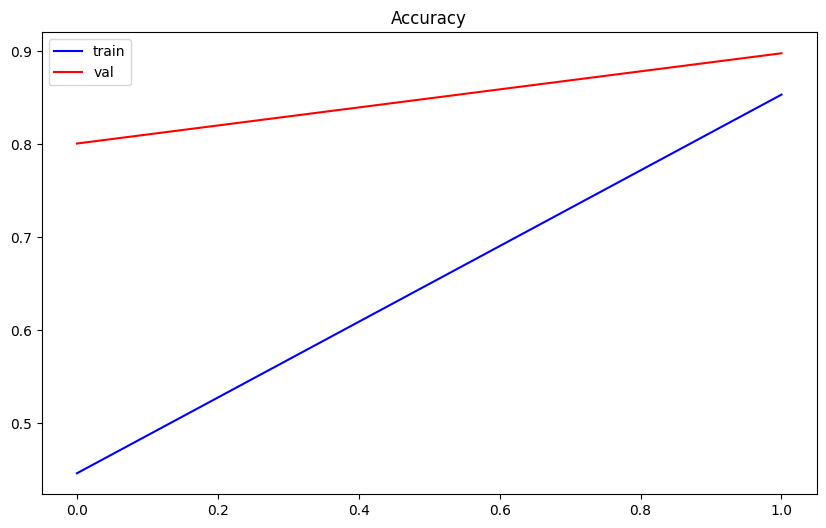

In [105]:
train_model(LeNet_model, X_train, Y_train, X_test, Y_test)

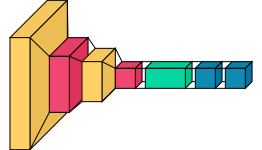

In [106]:
visualkeras.layered_view(LeNet_model)

In [107]:
# predict labels for the test set
y_test_pred = []
for i in range(len(X_test)):
  img = X_test[i]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  # one-hot vector output
  vec_p = LeNet_model.predict(img)
  # determine the label corresponding to vector vec_p
  y_p = np.argmax(vec_p)
  y_test_pred.append(y_p)
  
# convert y_test_pred from list to array
y_test_pred = np.asarray(y_test_pred)

1/1 [==============================] - 0s 95ms/step


Text(70.72222222222221, 0.5, 'True classes')

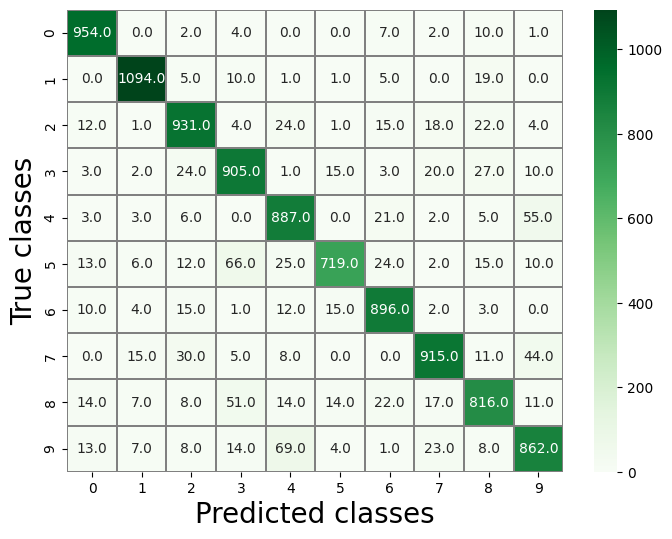

In [108]:
con_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

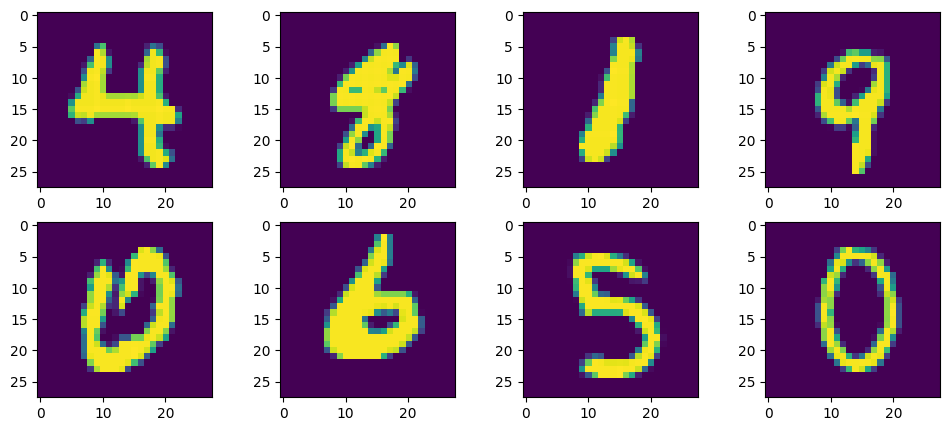

In [109]:
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])

In [110]:
#LeNet_model.save('LeNet_model.keras')